In [1]:
import os
import pandas as pd
import glob
import numpy as np
import re

In [2]:
os.chdir('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology')

In [3]:
table = pd.read_csv('abundance_table_raw.tsv', sep = '\t')

In [4]:
grazing_core = list(pd.read_csv('core_virome/core_virome_50_grazing_final.tsv', sep ='\t')['votu'])
beefdairy_core = list(pd.read_csv('core_virome/core_virome_50_beefdairy_final.tsv', sep ='\t')['votu'])
species_core = list(pd.read_csv('core_virome/core_virome_50_species_final.tsv', sep ='\t')['votu'])

In [5]:
meta = pd.read_csv('../../metadata.csv')

In [6]:
meta

,id,species,beef_or_dairy,grazing_or_not,collection_method,geography,project,file_path
0,ERR2027889,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
1,ERR2027890,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
2,ERR2027891,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
3,ERR2027892,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
4,ERR2027893,Bos_taurus,beef,no,slau,UK,PRJEB21624,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
...,...,...,...,...,...,...,...,...
970,SRR12529377,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
971,SRR12529378,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
972,SRR12529379,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...
973,SRR12529380,Capra_hircus,na,no,slau,China,PRJNA657455,/fs/ess/PAS0439/MING/virome/virus_contigs_keep...


In [7]:
meta[~meta.species.isin(['Bos_taurus', 'Ovis_aries', 'Capra_hircus', 'Bos_grunniens', 'Bos_indicus'])].groupby('species').species.count()

species
Alces_alces               6
Bison_bison               8
Bubalus_bubalis           5
Capreolus_pygargus        5
Cervus_elaphus            5
Hydropotes_inermis        5
Odocoileus_virginianus    7
Rangifer_tarandus         2
Name: species, dtype: int64

In [8]:
beef = list(meta.query('beef_or_dairy == "beef" ')['id'])
dairy = list(meta.query('beef_or_dairy == "dairy" ')['id'])

In [9]:
beef_mapped = table.loc[:, beef].sum()

In [10]:
beef_core = table[table.Contig.isin(beefdairy_core)].loc[:,beef].sum()

In [11]:
beef_core_abundance = list(beef_core/beef_mapped.tolist())

In [12]:
dairy_mapped = table.loc[:, dairy].sum()
dairy_core = table[table.Contig.isin(beefdairy_core)].loc[:,dairy].sum()
dairy_core_abundance = list(dairy_core/dairy_mapped.tolist())

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scikit_posthocs as sp
from matplotlib import rcParams

In [14]:
beefdairy_df = pd.DataFrame({'category': ['Dairy']*len(dairy_core_abundance) + ['Beef']*len(beef_core_abundance), 'abundance':dairy_core_abundance + beef_core_abundance})

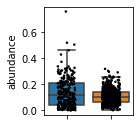

In [32]:
rcParams['figure.figsize'] = 1.6,2
ax = sns.boxplot(x = 'category', y='abundance', data= beefdairy_df, fliersize = 0)
ax = sns.stripplot(x = 'category', y='abundance', data= beefdairy_df, color="black", jitter=0.2, size=2.5)
ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')

plt.savefig('beefdairy_core_abundance.svg', facecolor = 'w', edgecolor = 'w')

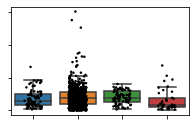

In [30]:
sheep = list(meta.query('species == "Ovis_aries" ')['id'])
sheep_mapped = table.loc[:, sheep].sum()
sheep_core = table[table.Contig.isin(species_core)].loc[:,sheep].sum()
sheep_core_abundance = list(sheep_core/sheep_mapped.tolist())

cattle = list(meta.query('species == "Bos_taurus" ')['id'])
cattle_mapped = table.loc[:, cattle].sum()
cattle_core = table[table.Contig.isin(species_core)].loc[:,cattle].sum()
cattle_core_abundance = list(cattle_core/cattle_mapped.tolist())

goat = list(meta.query('species == "Capra_hircus" ')['id'])
goat_mapped = table.loc[:, goat].sum()
goat_core = table[table.Contig.isin(species_core)].loc[:,goat].sum()
goat_core_abundance = list(goat_core/goat_mapped.tolist())

wild = list(meta[~meta.species.isin(['Bos_taurus', 'Ovis_aries', 'Capra_hircus', 'Bos_grunniens', 'Bos_indicus','Bubalus_bubalis'])]['id'])
wild_mapped = table.loc[:, wild].sum()
wild_core = table[table.Contig.isin(species_core)].loc[:,wild].sum()
wild_core_abundance = list(wild_core/wild_mapped.tolist())

species_df = pd.DataFrame({'category': ['Sheep']*len(sheep_core_abundance) + ['Cattle']*len(cattle_core_abundance) + ['Goat']*len(goat_core_abundance) + ['Wild']*len(wild_core_abundance), 'abundance':sheep_core_abundance + cattle_core_abundance + goat_core_abundance + wild_core_abundance})
rcParams['figure.figsize'] = 3.2,2

ax = sns.boxplot(x = 'category', y='abundance', data= species_df, fliersize = 0)
ax = sns.stripplot(x = 'category', y='abundance', data= species_df, color="black", jitter=0.2, size=2.5)
ax.set(xlabel='',ylabel='', yticklabels='', xticklabels='')

plt.savefig('species_core_abundance.svg', facecolor = 'w', edgecolor = 'w')

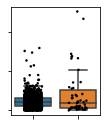

In [31]:
graze = list(meta.query('grazing_or_not == "yes" ')['id'])
graze_mapped = table.loc[:, graze].sum()
graze_core = table[table.Contig.isin(grazing_core)].loc[:,graze].sum()
graze_core_abundance = list(graze_core/graze_mapped.tolist())

non = list(meta.query('grazing_or_not == "no" ')['id'])
non_mapped = table.loc[:, non].sum()
non_core = table[table.Contig.isin(grazing_core)].loc[:,non].sum()
non_core_abundance = list(non_core/non_mapped.tolist())

grazing_df = pd.DataFrame({'category': ['Non-grazing']*len(non_core_abundance) + ['Grazing']*len(graze_core_abundance), 'abundance':non_core_abundance + graze_core_abundance})
rcParams['figure.figsize'] = 1.6,2
ax = sns.boxplot(x = 'category', y='abundance', data= grazing_df, fliersize = 0)
ax = sns.stripplot(x = 'category', y='abundance', data= grazing_df, color="black", jitter=0.2, size=2.5)
ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')

plt.savefig('grazing_core_abundance.svg', facecolor = 'w', edgecolor = 'w')